<a href="https://colab.research.google.com/github/Rajatyadav9826/assignment--01/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

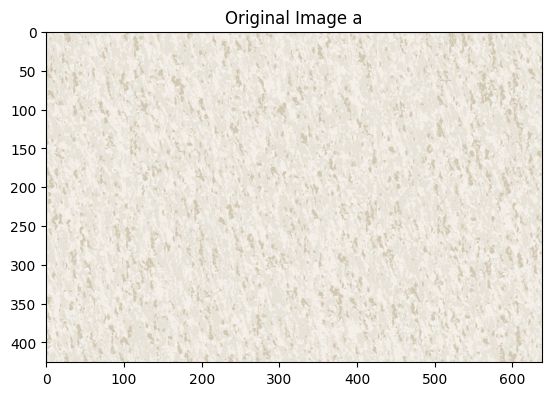

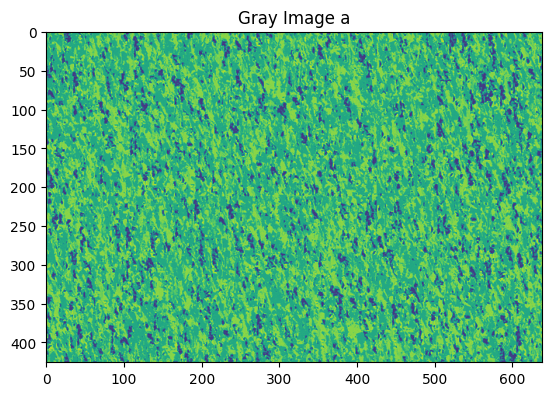

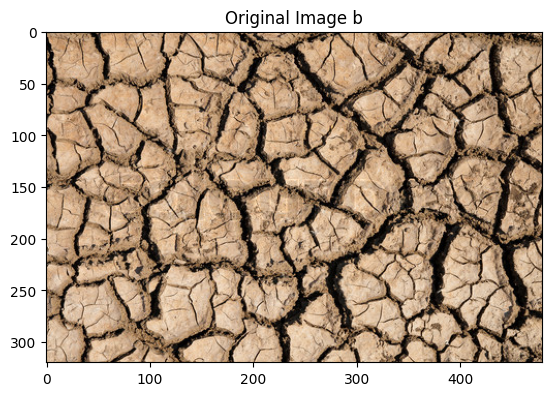

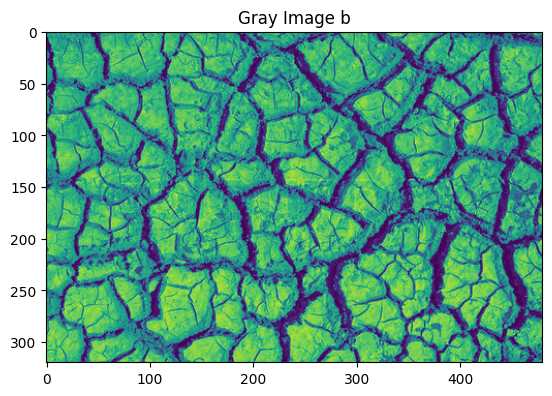

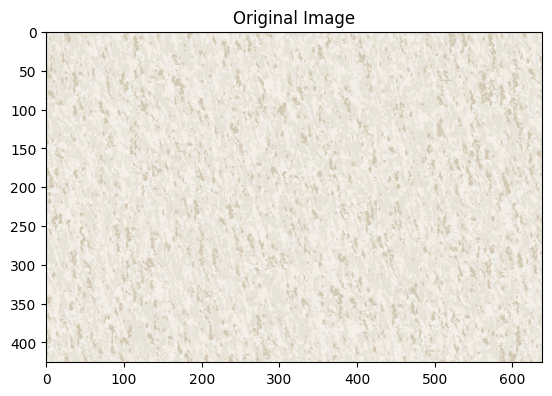

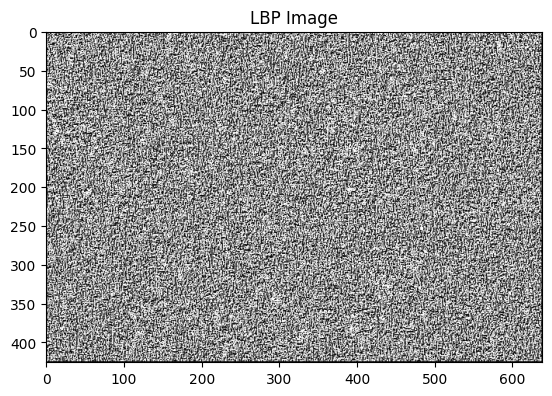

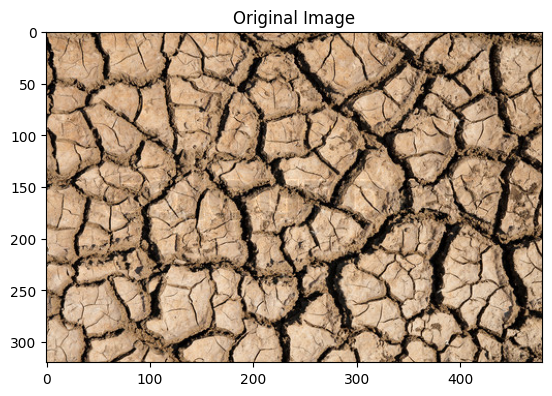

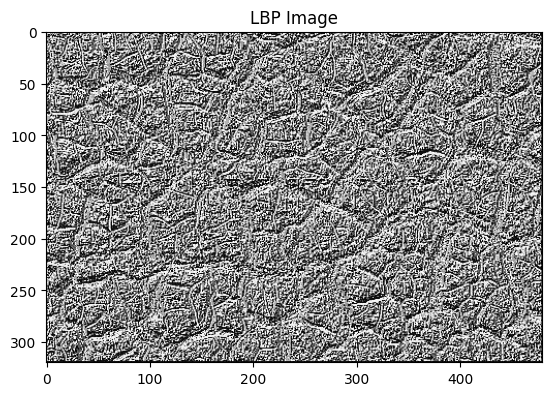

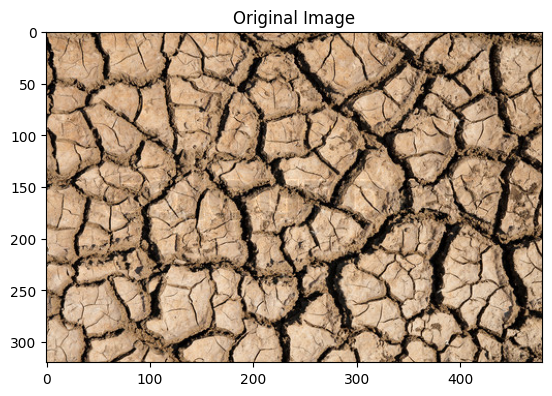

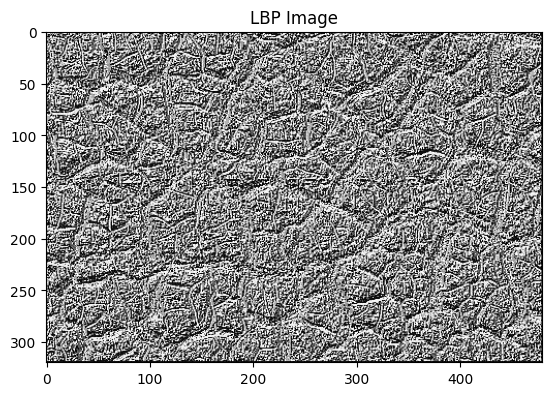

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow



url2img_a = "https://i.ibb.co/Kxbc9RQ/Whats-App-Image-2024-01-25-at-10-32-53-PM-1.jpg"
url2img_b = "https://i.ibb.co/V2pqZSL/Whats-App-Image-2024-01-25-at-10-32-53-PM.jpg"

Img_a = io.imread(url2img_a)
Img_b = io.imread(url2img_b)

plt.imshow(Img_a)
plt.title("Original Image a")
plt.show()

GrayImage_a = cv.cvtColor(Img_a, cv.COLOR_BGR2GRAY)
plt.imshow(GrayImage_a)
plt.title("Gray Image a")
plt.show()

plt.imshow(Img_b)
plt.title("Original Image b")
plt.show()

GrayImage_b = cv.cvtColor(Img_b, cv.COLOR_BGR2GRAY)
plt.imshow(GrayImage_b)
plt.title("Gray Image b")
plt.show()



def compareValues(image, centerValue, x, y):
  newCenteralValue = 0
  try:
    if image[x][y] >= centerValue:
      newCenteralValue = 1
  except:
    pass
  return newCenteralValue



def getLBP(image, x, y):
  center = image[x][y]
  binaryArray = []     #compare nearby values and put 0 or 1 in this array

  #top value
  binaryArray.append(compareValues(image, center,[x-1],y))
  #top left value
  binaryArray.append(compareValues(image, center, x-1,y-1))
  #top right value
  binaryArray.append(compareValues(image, center, x-1,y+1))

  #left value
  binaryArray.append(compareValues(image, center, x,y-1))
  #right value
  binaryArray.append(compareValues(image, center, x,y+1))

  #bottom value
  binaryArray.append(compareValues(image, center, x+1,y))
  #bottom left value
  binaryArray.append(compareValues(image, center, x+1,y-1))
  #bottom right value
  binaryArray.append(compareValues(image, center, x+1,y+1))

  powers = [1, 2, 4, 8, 16, 32, 64, 128]

  value = 0

  for i in range(len(binaryArray)):
    value += binaryArray[i]*powers[i]

  return value



def showLBPImage(image, grayImage):
	height, width, _ = image.shape
	img_lbp = np.zeros((height, width), np.uint8)

	for i in range(0, height):
		for j in range(0, width):
			img_lbp[i, j] = getLBP(grayImage, i, j)

	plt.imshow(image)
	plt.title("Original Image")
	plt.show()
	plt.imshow(img_lbp, cmap ="gray")
	plt.title("LBP Image")
	plt.show()



showLBPImage(Img_a, GrayImage_a)
showLBPImage(Img_b, GrayImage_b)
showLBPImage(Img_b,GrayImage_b)